In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [250]:
train_img_datagen = ImageDataGenerator(rescale=1 / 255.0,validation_split=0.2,width_shift_range=0.1, height_shift_range=0.1)

In [251]:
path_train='Data'

In [252]:
train = train_img_datagen.flow_from_directory(directory=path_train,target_size=(64, 64),color_mode="grayscale",class_mode="categorical",subset='training',seed=42,batch_size=30)
valid = train_img_datagen.flow_from_directory(directory=path_train,target_size=(64,64),color_mode="grayscale",class_mode="categorical",subset='validation',seed=42,batch_size=30)

Found 38214 images belonging to 31 classes.
Found 9538 images belonging to 31 classes.


In [255]:
classes=31

In [256]:
s=pd.Series(train.class_indices)

In [257]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input, BatchNormalization
from tensorflow.keras.utils import plot_model
%matplotlib inline
import matplotlib.pyplot as plt

In [265]:
model = Sequential()

In [266]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,1]))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,1]))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,1]))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(31,activation='softmax'))

In [267]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 32)        

In [268]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [269]:
model.fit(train,validation_data = valid,steps_per_epoch = 100,validation_steps = 10,epochs=50)

Epoch 1/50
100/100 [==============================] - 9s 91ms/step - loss: 2.7035 - accuracy: 0.2480 - val_loss: 1.8507 - val_accuracy: 0.4733
Epoch 2/50
100/100 [==============================] - 9s 90ms/step - loss: 1.1865 - accuracy: 0.6567 - val_loss: 0.9552 - val_accuracy: 0.7000
Epoch 3/50
100/100 [==============================] - 10s 101ms/step - loss: 0.7620 - accuracy: 0.7705 - val_loss: 0.7289 - val_accuracy: 0.7333
Epoch 4/50
100/100 [==============================] - 10s 100ms/step - loss: 0.5294 - accuracy: 0.8390 - val_loss: 0.7287 - val_accuracy: 0.7700
Epoch 5/50
100/100 [==============================] - 10s 98ms/step - loss: 0.4037 - accuracy: 0.8770 - val_loss: 0.4941 - val_accuracy: 0.8667
Epoch 6/50
100/100 [==============================] - 10s 97ms/step - loss: 0.3658 - accuracy: 0.8947 - val_loss: 0.3928 - val_accuracy: 0.8833
Epoch 7/50
100/100 [==============================] - 10s 95ms/step - loss: 0.2950 - accuracy: 0.9180 - val_loss: 0.3592 - val_accuracy:

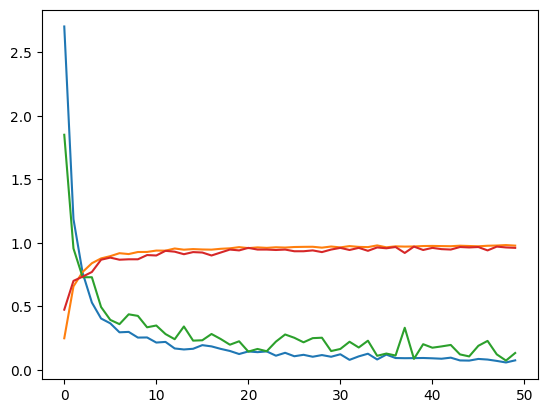

In [270]:
plt.plot(pd.DataFrame(model.history.history))
plt.show()

In [271]:
#model.save('Model5.hdf5')

In [3]:
from keras.models import load_model
model = load_model('Model2.hdf5')

In [273]:
valid = train_img_datagen.flow_from_directory(directory=path_train,target_size=(64,64),color_mode="grayscale",shuffle=False,)

Found 47752 images belonging to 31 classes.


In [274]:
y=model.predict(valid)

1493/1493 [==============================] - 62s 41ms/step


In [275]:
ytest=valid.classes

In [276]:
yhat=[]
for i in range(0,len(y)):    
    yhat.append(np.argmax(y[i]))

In [277]:
from sklearn.metrics import classification_report,confusion_matrix

In [278]:
confusion_matrix(ytest,yhat)

array([[1527,    0,    1,   18,    0,    0,    0,    2,    1,    2,    1,
           4,    1,    2,   18,    0,   10,    0,    0,    0,    1,    3,
           0,    0,    0,    0,    0,    0,    0,    1,    0],
       [   0, 1557,    0,    4,    8,    0,    1,    3,    0,    1,    0,
           3,    0,    5,    0,    2,    0,    1,    0,    0,    1,    0,
           0,    0,    0,    0,    0,    1,    0,    0,    5],
       [   1,    0, 1578,    1,    0,    0,    4,    0,    0,    0,    1,
           1,    0,    0,    2,    0,    1,    1,    0,    0,    2,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    1,    0, 1558,    0,    0,    0,    0,    0,    2,    0,
           2,    1,    8,   10,    3,    5,    0,    0,    0,    0,    0,
           0,    1,    1,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1568,    7,    0,    3,    0,    0,    1,
           1,    0,    0,    6,    0,    1,    1,    0,    0,    3,    0,
        

In [279]:
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1592
           1       0.99      0.98      0.98      1592
           2       0.99      0.99      0.99      1592
           3       0.98      0.98      0.98      1592
           4       0.99      0.98      0.99      1592
           5       0.99      0.99      0.99      1592
           6       0.99      0.95      0.97      2388
           7       0.97      0.99      0.98      1592
           8       0.92      0.81      0.86      1592
           9       0.98      0.97      0.98      1592
          10       0.99      0.99      0.99      1592
          11       0.86      0.97      0.91      2384
          12       0.99      0.99      0.99      1592
          13       0.98      0.99      0.98      1592
          14       0.96      1.00      0.98      2384
          15       0.99      0.99      0.99      1592
          16       0.95      0.97      0.96      1592
          17       0.97    

In [4]:
from tensorflow.keras.preprocessing.image import load_img , img_to_array

In [17]:
fname='Static/file4.png'

In [7]:
import pickle

In [8]:
s=pickle.load( open("Classes.pkl",'rb'))

In [182]:
def predict(img):
    #img = load_img(filename)
    #img = img.convert('L')
    arr=img_to_array(img).reshape(img_to_array(img).shape[0], img_to_array(img).shape[1])
    #print(arr)
    li=[]
    ind=[]
    for col in range(arr.shape[1]):
        #print(col)
        li.append(arr[:,col])
        #print(li[0])
        if np.mean(li[0])>=245:
            ind.append(col)
        li=[]
    b=[]
    #af=0
    #space=[]
    for i in ind:   
        if i+1 not in ind or i-1 in ind:
            b.append(i)
            #space.append(af)
        #af=af+1
    loc=[]
    bla=0
    for sp in range(len(b)-1):
        if b[sp+1]-b[sp]>30:
            loc.append(bla)
        bla=bla+1
    #print(loc)
    new=[]
    coun=0
    for ps in range(len(loc)-1):
        if loc[ps+1]-loc[ps]>20:
            new.append(coun)
        coun=coun+1
    #print(new)
    final=np.split(arr, b, axis=1)
    c=0
    emp=[]
    #print(b)
    
    
    for i in final:
        if c==0 or c==len(final)-1:
            pass
        elif i.shape[1]>10:
        #print(i.shape)
            #plt.show()
            img = Image.fromarray(i)
            #img.save(c,'.png')
            #img=img.resize(64,64)
            #print(type(i))
            #plt.imshow(img.resize([64,64]))
            #plt.show()
            print(img.size)
            #img=img.resize([img.size[0],img.size[1]]).crop([0,0,64,64])
            emp.append(multi(img.resize([64,64])))
        c=c+1
        plt.show()
    for k in new:
        emp.insert(k+1," ")
    #print(space)
    return emp

In [183]:
def multi(img):
    plt.imshow(img)
    plt.show()
    img = img_to_array(img)
    print(img.shape)
    #na = (255-img)
    na = img/255
    na = na.reshape(1,64,64,1 )
    temp = model.predict(na)
    temp = np.argmax(temp)
    return s[s.values==temp].index[0].split('-')[-1]

In [184]:
def para(filename):
    img = load_img(filename)
    #img = load_img('Static/alpha.png')
    img = img.convert('L')
    arr1=img_to_array(img).reshape(img_to_array(img).shape[0], img_to_array(img).shape[1])
    #print(arr1.shape)
    ri=[]
    rw=[]
    for row in range(arr1.shape[0]):
        #print(row)
        ri.append(arr1[row,:])
        #print(ri[0])
        if np.mean(ri[0])>=250:
            rw.append(row)
        ri=[]
    d=[]
    #print(rw)
    for i in rw:   
        if i+1 not in rw or i-1 in rw:
            d.append(i)
    #print(d)
    final1=np.split(arr1, d, axis=0)
    g=0
    an=[]
    for i in final1:
        if g==0 or g==len(final1)-1 :
            pass
        elif i.shape[1]>10:
            #print(i.shape)
            img = Image.fromarray(i)
            plt.imshow(img)
            plt.show()
            an.append(predict(img))
        g=g+1
    plt.show()
    return an

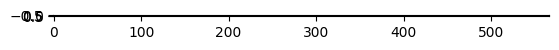

[]


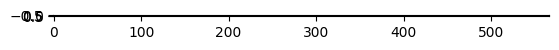

[]


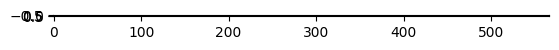

[]


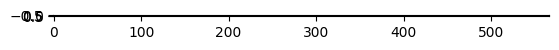

[]


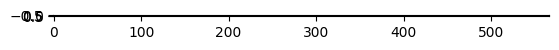

[]


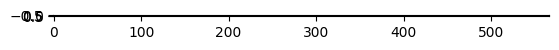

[]


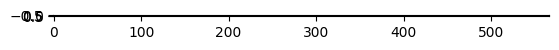

[]


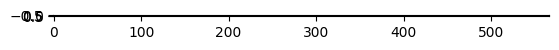

[]


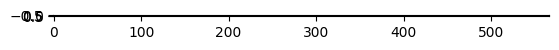

[]


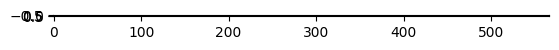

[]


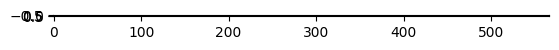

[]


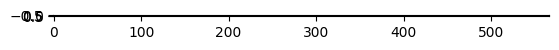

[]


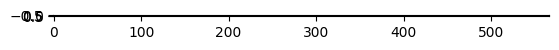

[]


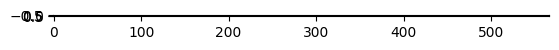

[]


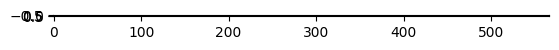

[]


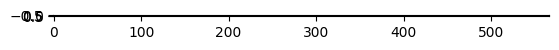

[]


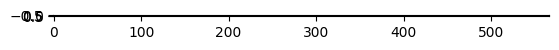

[]


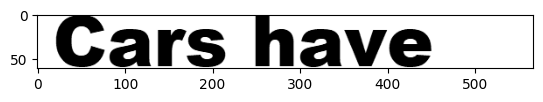

[3]
(57, 61)


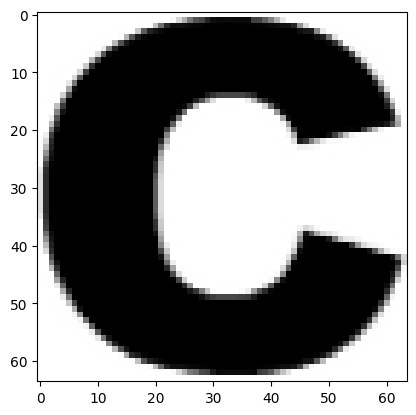

(64, 64, 1)
1/1 [==============================] - 0s 19ms/step
(48, 61)


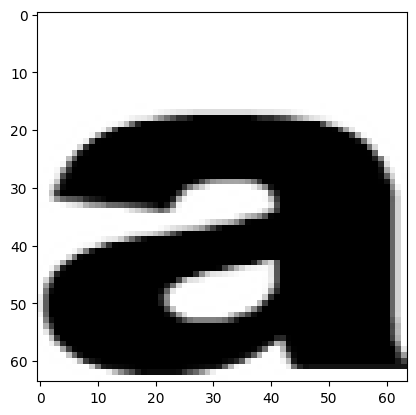

(64, 64, 1)
1/1 [==============================] - 0s 26ms/step
(34, 61)


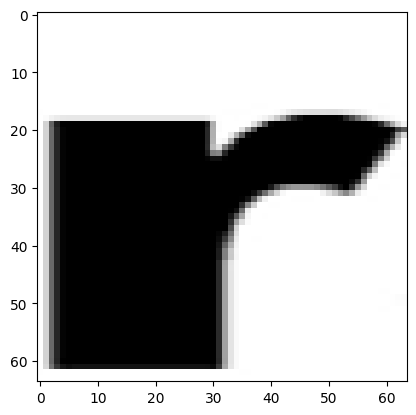

(64, 64, 1)
1/1 [==============================] - 0s 18ms/step
(45, 61)


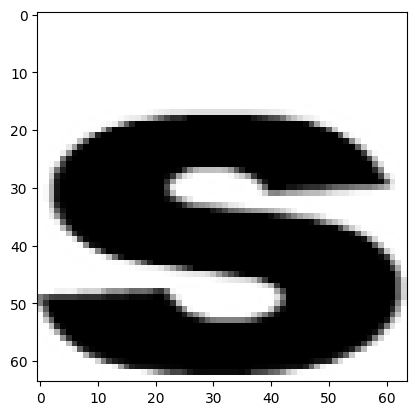

(64, 64, 1)
1/1 [==============================] - 0s 28ms/step
(47, 61)


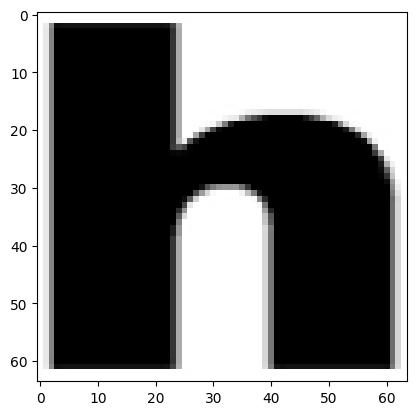

(64, 64, 1)
1/1 [==============================] - 0s 19ms/step
(48, 61)


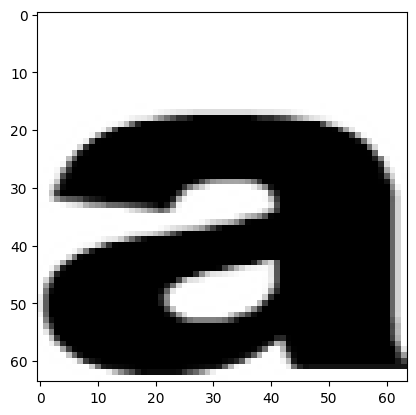

(64, 64, 1)
1/1 [==============================] - 0s 19ms/step
(49, 61)


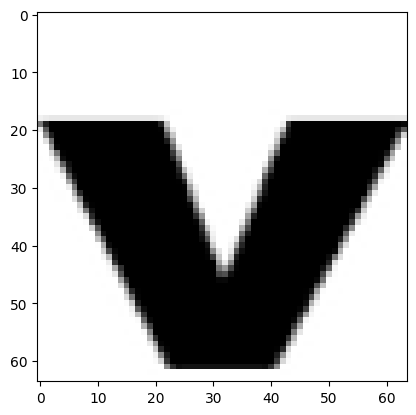

(64, 64, 1)
1/1 [==============================] - 0s 19ms/step
(50, 61)


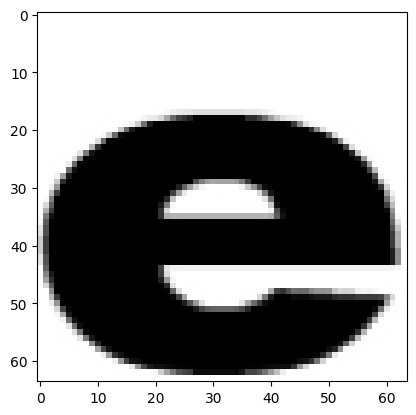

(64, 64, 1)
1/1 [==============================] - 0s 27ms/step


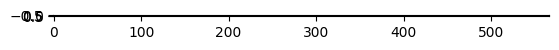

[]


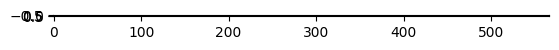

[]


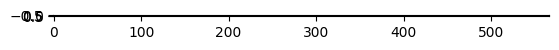

[]


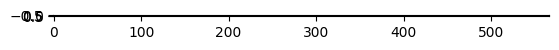

[]


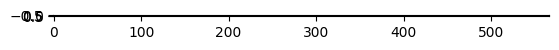

[]


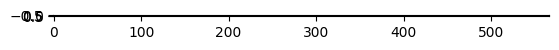

[]


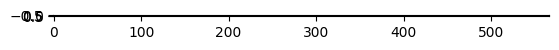

[]


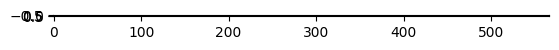

[]


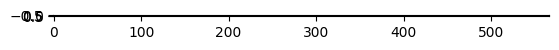

[]


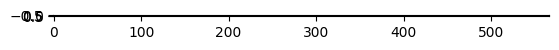

[]


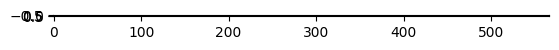

[]


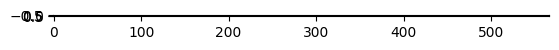

[]


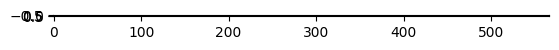

[]


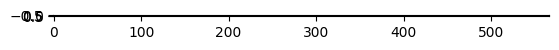

[]


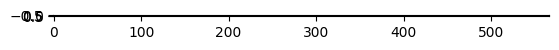

[]


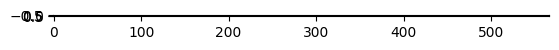

[]


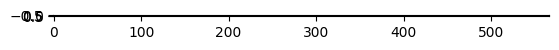

[]


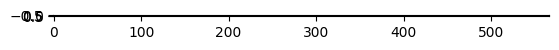

[]


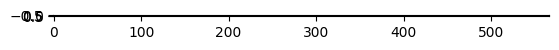

[]


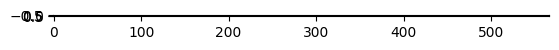

[]


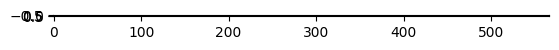

[]


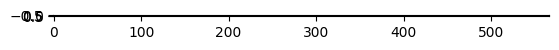

[]


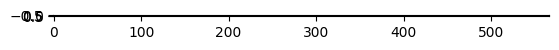

[]


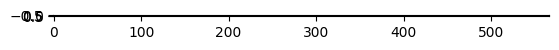

[]


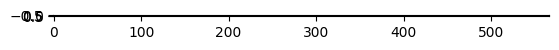

[]


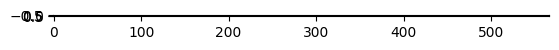

[]


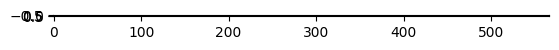

[]


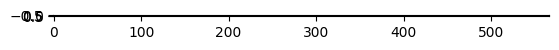

[]


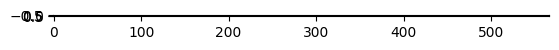

[]


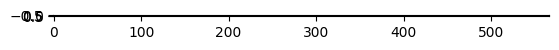

[]


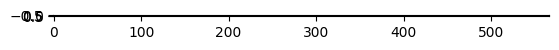

[]


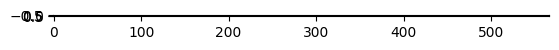

[]


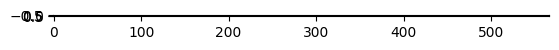

[]


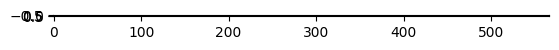

[]


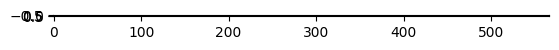

[]


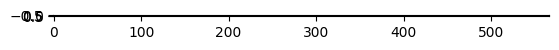

[]


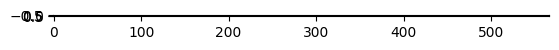

[]


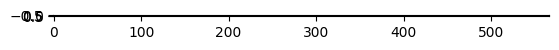

[]


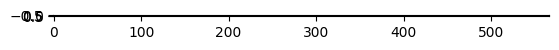

[]


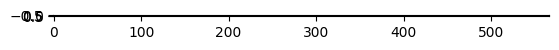

[]


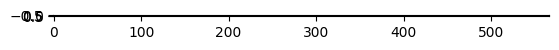

[]


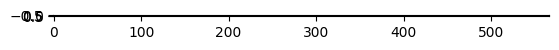

[]


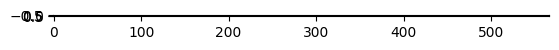

[]


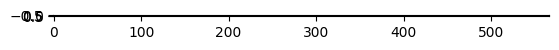

[]


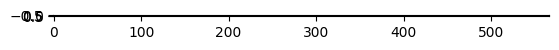

[]


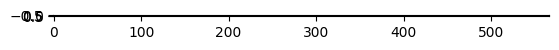

[]


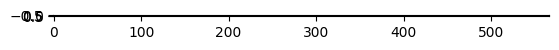

[]


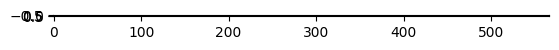

[]


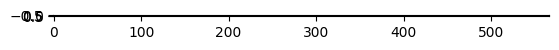

[]


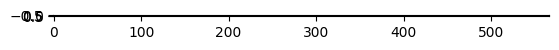

[]


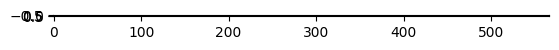

[]


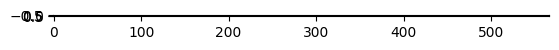

[]


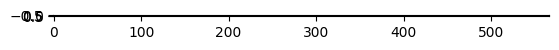

[]


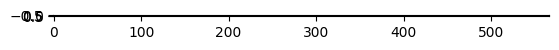

[]


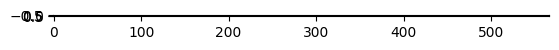

[]


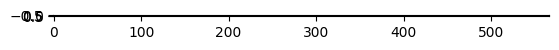

[]


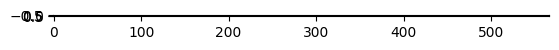

[]


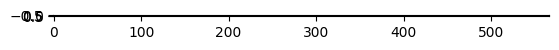

[]


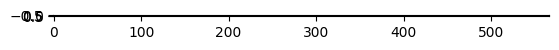

[]


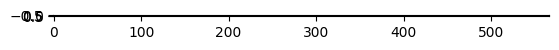

[]


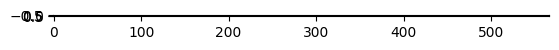

[]


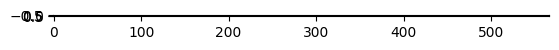

[]


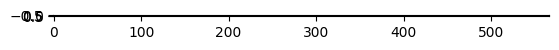

[]


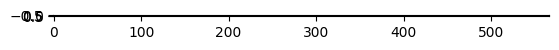

[]


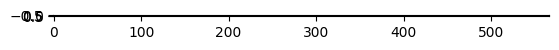

[]


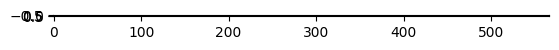

[]


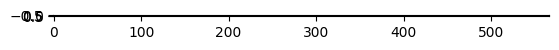

[]


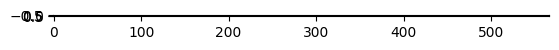

[]


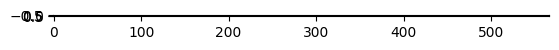

[]


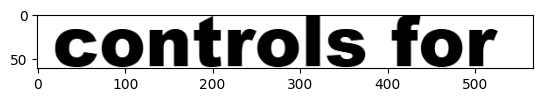

[6]
(49, 61)


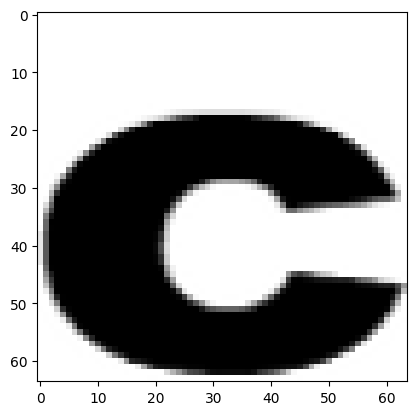

(64, 64, 1)
1/1 [==============================] - 0s 17ms/step
(49, 61)


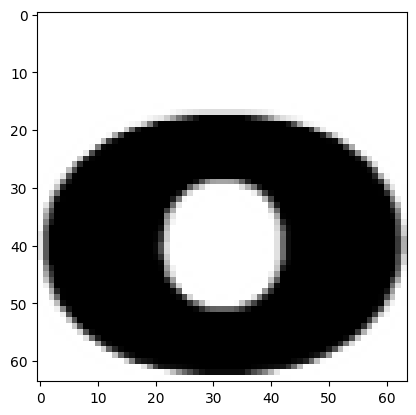

(64, 64, 1)
1/1 [==============================] - 0s 19ms/step
(47, 61)


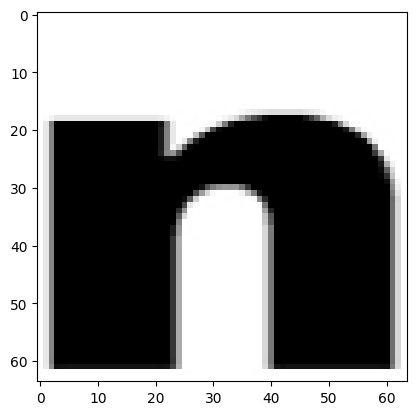

(64, 64, 1)
1/1 [==============================] - 0s 22ms/step
(34, 61)


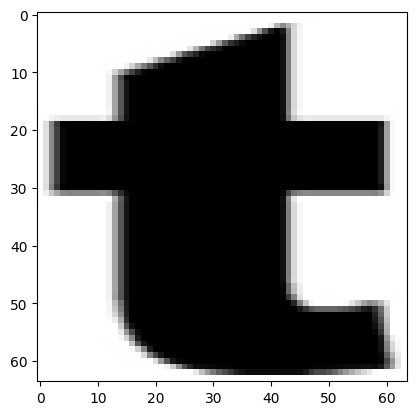

(64, 64, 1)
1/1 [==============================] - 0s 19ms/step
(34, 61)


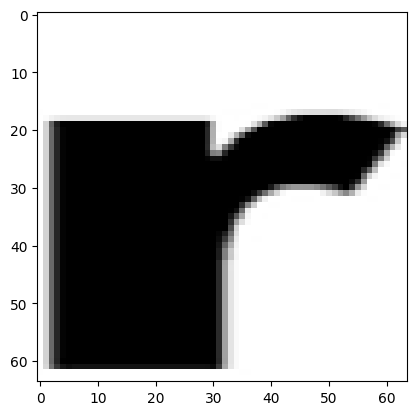

(64, 64, 1)
1/1 [==============================] - 0s 16ms/step
(49, 61)


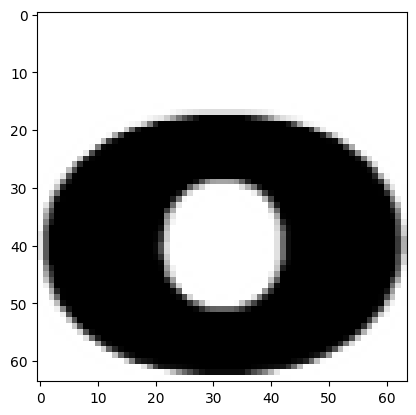

(64, 64, 1)
1/1 [==============================] - 0s 18ms/step
(19, 61)


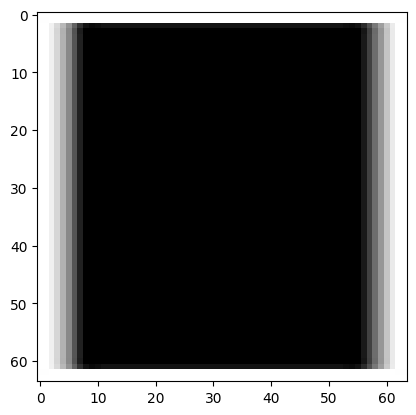

(64, 64, 1)
1/1 [==============================] - 0s 18ms/step
(45, 61)


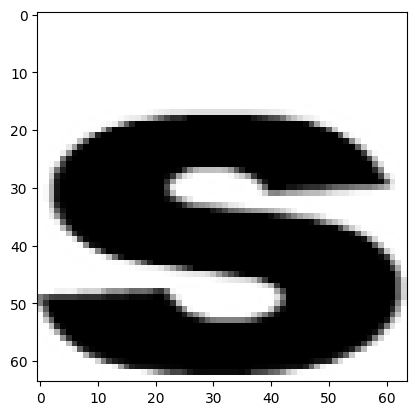

(64, 64, 1)
1/1 [==============================] - 0s 21ms/step
(34, 61)


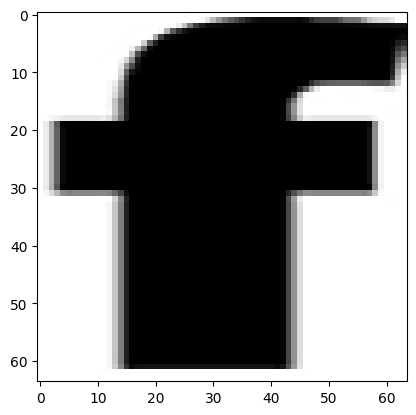

(64, 64, 1)
1/1 [==============================] - 0s 16ms/step
(49, 61)


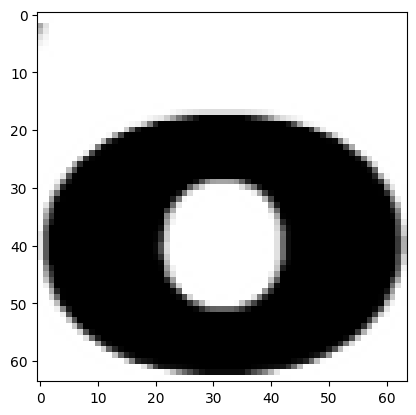

(64, 64, 1)
1/1 [==============================] - 0s 6ms/step
(34, 61)


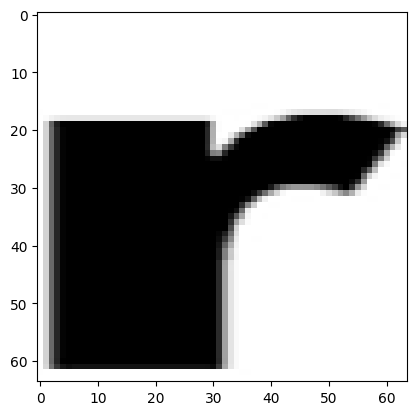

(64, 64, 1)
1/1 [==============================] - 0s 31ms/step


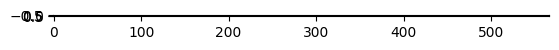

[]


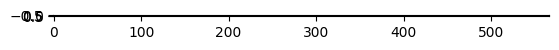

[]


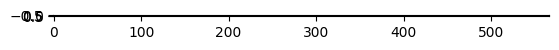

[]


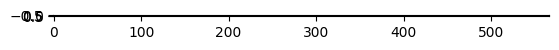

[]


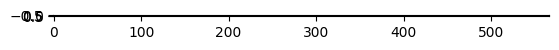

[]


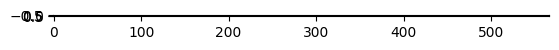

[]


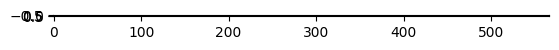

[]


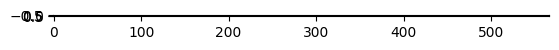

[]


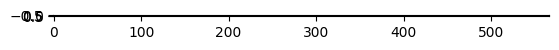

[]


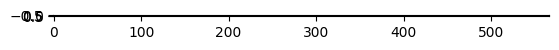

[]


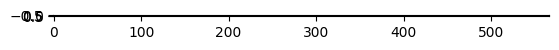

[]


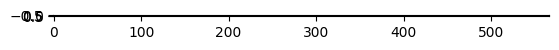

[]


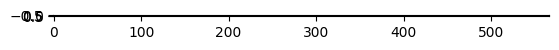

[]


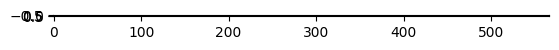

[]


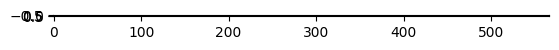

[]


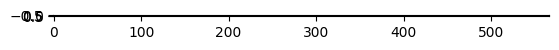

[]


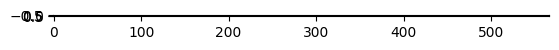

[]


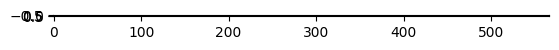

[]


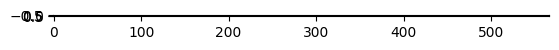

[]


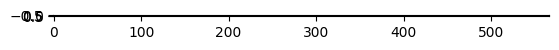

[]


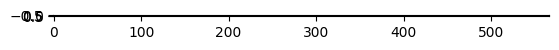

[]


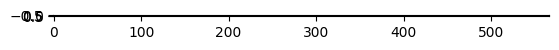

[]


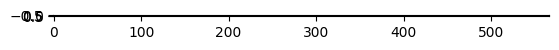

[]


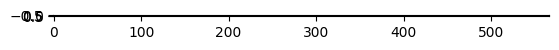

[]


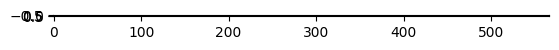

[]


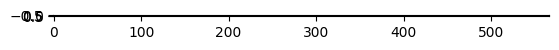

[]


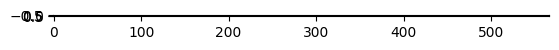

[]


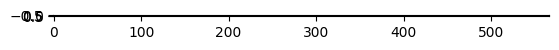

[]


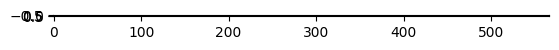

[]


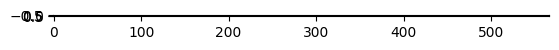

[]


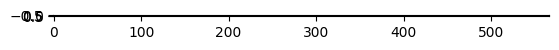

[]


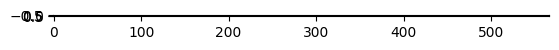

[]


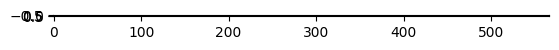

[]


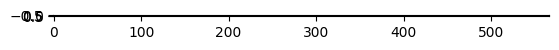

[]


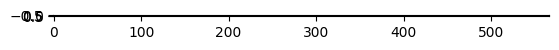

[]


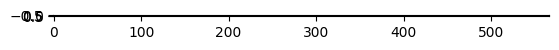

[]


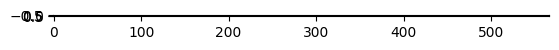

[]


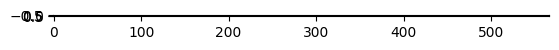

[]


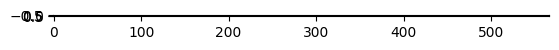

[]


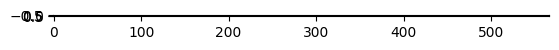

[]


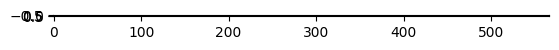

[]


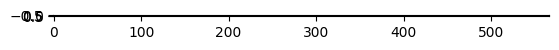

[]


In [185]:
a=para(fname)

In [186]:
for i in a:
    if i :
        print(i)

['C', 'a', 'r', 'e', ' ', 'h', 'a', 'V', 'e']
['C', 'O', 'n', 't', 'r', 'O', 'I', ' ', 'e', 'f', 'O', 'r']
